# IPL AUCTION 2023

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("iplauction2023.csv")

In [3]:
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


# Data Understanding

In [4]:
print(df.shape)

(309, 7)


In [6]:
print(df.columns)

Index(['name', 'player style', 'nationality', 'base price (in lacs)',
       'final price (in lacs)', 'franchise', 'status'],
      dtype='object')


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB
None


In [9]:
df.loc[df.duplicated(subset=['name'])]

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status


Missing Values

In [10]:
missing_values_count = df.isnull().sum()
missing_values_count[0:7]

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

Missing Data percentage

In [11]:
# how many total missing values
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

13.869625520110956

In [12]:
df.describe()

,base price (in lacs),final price (in lacs)
count,151.000000,238.000000
mean,59.205298,368.067227
std,59.688337,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,75.000000,625.000000
max,200.000000,1850.000000


In [13]:
df.describe(include=["object", "bool"])

,name,player style,nationality,franchise,status
count,309,309,309,238,309
unique,309,4,14,10,3
top,Harshit Rana,Bowler,India,RR,RETAINED
freq,1,111,201,25,158


# Data Cleaning

handling the categorical data

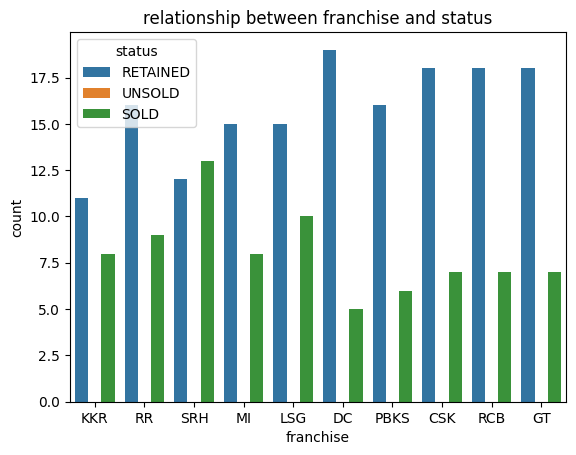

In [14]:
sns.countplot(x="franchise", hue="status", data=df)
plt.title("relationship between franchise and status");

It seems that unsold status have no franchaise. But it might seem this is me forcing the hand of the data. Let me plot a distribution of the data and see if any unsold status belongs to any franchaise.

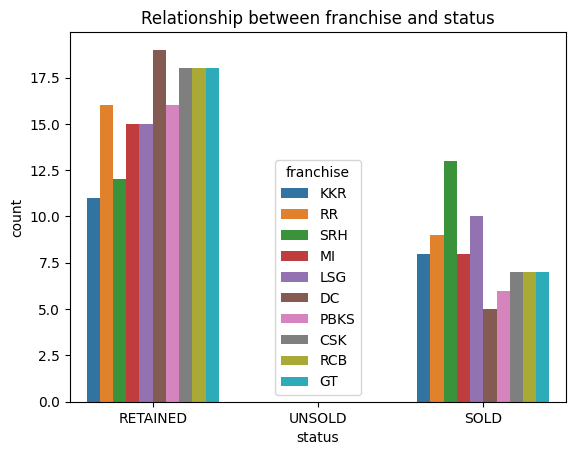

In [15]:
sns.countplot(x="status", hue="franchise", data=df)
plt.title("Relationship between franchise and status");

In [16]:
percentage_counts = df['status'].value_counts(normalize=True)*100
print(percentage_counts)

RETAINED    51.132686
SOLD        25.889968
UNSOLD      22.977346
Name: status, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

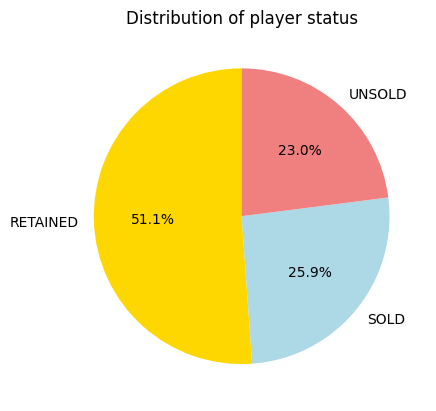

In [17]:
plt.pie(percentage_counts, labels = percentage_counts.index, autopct = '%1.1f%%', startangle=90, colors=['gold',  'lightblue', 'lightcoral'])
plt.title('Distribution of player status')
plt.show

It's safe to assume that if a player is unsold, they do not belong to any franchise. So the data is not missing at random, it is not just available, so I would fill the missing valuses in franchaise with 'no francahise".

In [18]:
new_df = df.fillna({
        'franchise': 'no franchise'
    })
new_df

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,no franchise,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,no franchise,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,NaN,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,NaN,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,NaN,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,NaN,1600.0,DC,RETAINED


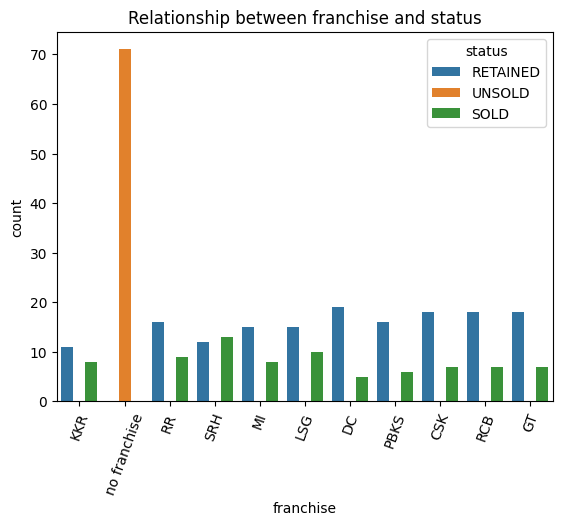

In [19]:
sns.countplot(x="franchise", hue="status", data=new_df)
plt.xticks(rotation = 70)
plt.title("Relationship between franchise and status")
plt.show()

Checking to see what percentage of missing values is remaining

In [20]:
# get the number of missing data points per column
missing_values_count = new_df.isnull().sum()
missing_values_count[0:7]

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                  0
status                     0
dtype: int64

In [21]:
# how many total missing values?
total_cells = np.product(new_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

10.587147480351364

let's handle base price (in lacs) and final price (in lacs). Is there a relationship between the final price, base price and status

In [22]:
#Creating a dataframae object for each status group
g = df.groupby("status")

In [23]:
#the properties of each group, count since data is categorical
g.count()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise
status,,,,,,
RETAINED,158,158,158,0,158,158
SOLD,80,80,80,80,80,80
UNSOLD,71,71,71,71,0,0


In [24]:
#price data for each status group
data=df.groupby('status')[['base price (in lacs)','final price (in lacs)']].mean().reset_index()
data

,status,base price (in lacs),final price (in lacs)
0,RETAINED,NaN,448.734177
1,SOLD,62.375000,208.750000
2,UNSOLD,55.633803,NaN


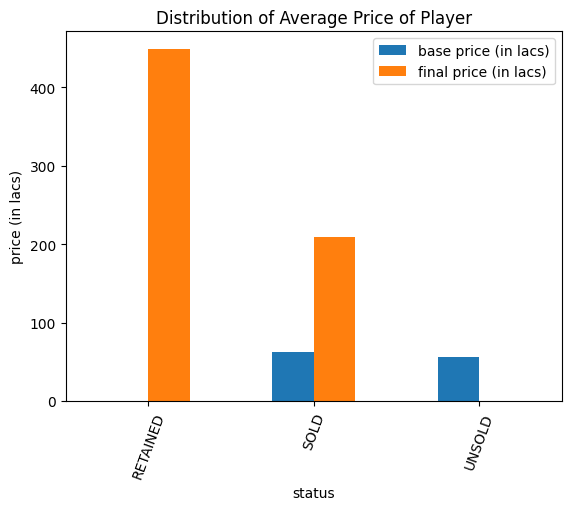

In [25]:
data.plot(kind='bar',x='status')
plt.xticks(rotation=70)
plt.ylabel('price (in lacs)')
plt.title('Distribution of Average Price of Player')
plt.show()

This simple table of the dataframe object shows that all retained players don't have a base price, all unsold players don't have a final price and franchise since they havn't been sold. I would go ahead and replace the missing base price and final price values with zero.

In [26]:
final_df = new_df.fillna({
        'base price (in lacs)': 0,
        'final price (in lacs)': 0
    })
final_df

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,0.0,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,0.0,no franchise,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,0.0,no franchise,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,0.0,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,0.0,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,0.0,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,0.0,1600.0,DC,RETAINED


Now the data has been cleaned, let's analyze the player availability for each franchise and the demands based on the player style.

PS - I didn't handle outliers in my dataset because I didn't want to loose any data since it's a small dataset. This however bit me in the back because it skwed some of my analysis. If I am to use this data for modeling, I need to remove the outliers in the prices.



# Data Analysis

Let's see the player style and country in each franchise

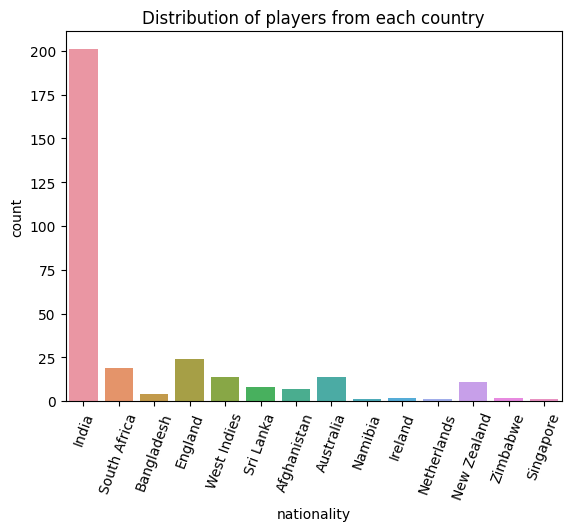

In [28]:
sns.countplot(x="nationality", data=final_df)
plt.title("Distribution of players from each country")
plt.xticks(rotation = 70)
plt.show()

Majority of the players are from India. Let's see if the international players have any relationship with price.

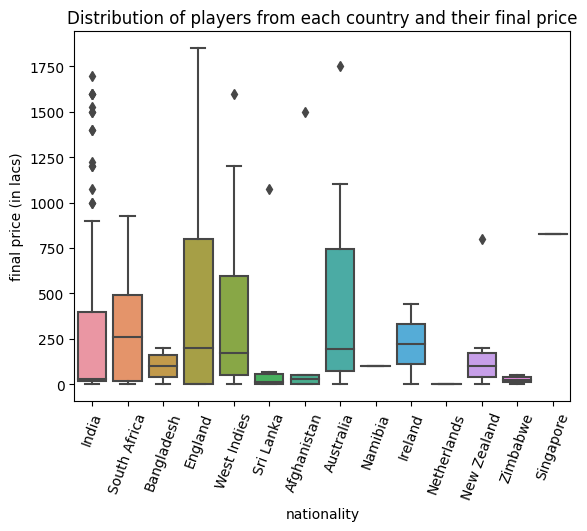

In [29]:
sns.boxplot(x='nationality',y='final price (in lacs)', data=final_df)
plt.title("Distribution of players from each country and their final price")
plt.xticks(rotation = 70)
plt.show()

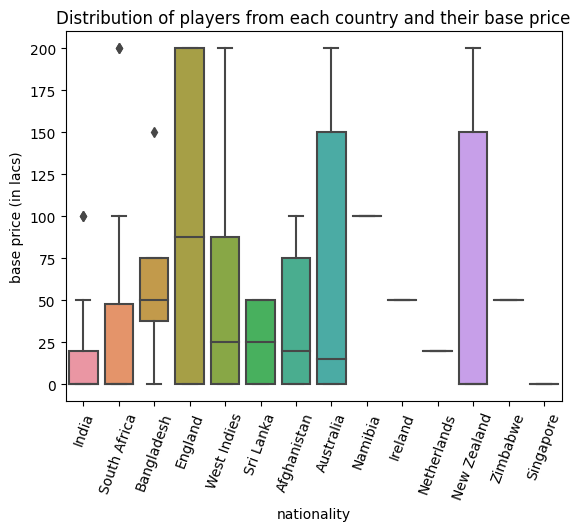

In [30]:
sns.boxplot(x='nationality',y='base price (in lacs)', data=final_df)
plt.title("Distribution of players from each country and their base price")
plt.xticks(rotation = 70)
plt.show()

Local players are generally more affordable than international players, both their base price and their final price

Let's see which player styles dominate the auction market and their status

In [31]:
pd.crosstab(final_df["status"], final_df["player style"], normalize=True)

player style,Allrounder,Batter,Bowler,WK-Batter
status,,,,
RETAINED,0.145631,0.103560,0.200647,0.061489
SOLD,0.103560,0.038835,0.080906,0.035599
UNSOLD,0.084142,0.035599,0.077670,0.032362


The player styles retained the most are the bowlers and then all rounders. Most players already sold this season are all rounders. The unsold players remaining in the market are mostly all rounders. WK-batters are the least likely to be retained. It also has the least about of players with this style.

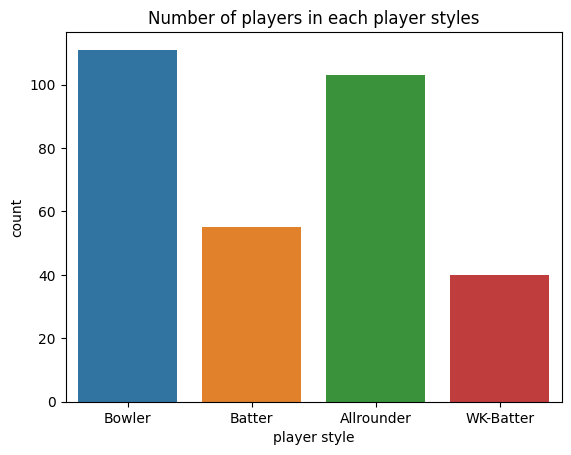

In [32]:
sns.countplot(x="player style", data=final_df)
plt.title("Number of players in each player styles")
plt.show()

Relationship between the player style and their prices

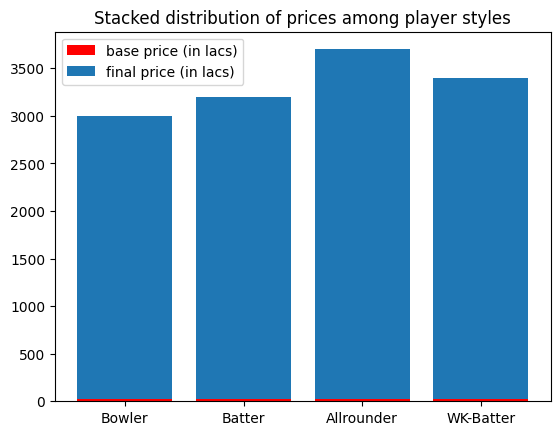

In [33]:
# plot bars in stack manner
plt.bar(final_df["player style"], final_df["base price (in lacs)"], color='r')
plt.bar(final_df["player style"], final_df["final price (in lacs)"], bottom=final_df["final price (in lacs)"])
plt.legend(["base price (in lacs)", "final price (in lacs)"])
plt.title("Stacked distribution of prices among player styles")
plt.show()

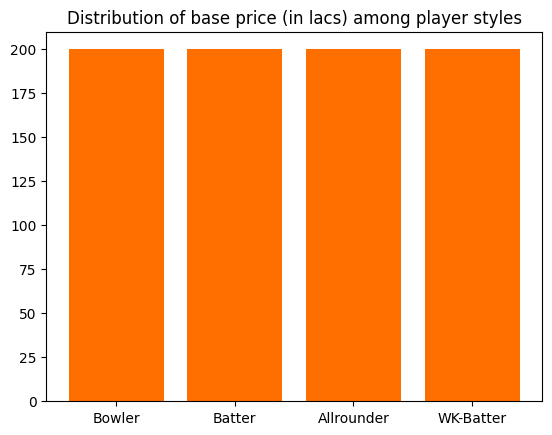

In [34]:
fig, ax=plt.subplots()
ax.bar(final_df["player style"], final_df['base price (in lacs)'], color =  '#FF6F00')
plt.title("Distribution of base price (in lacs) among player styles")
plt.show()

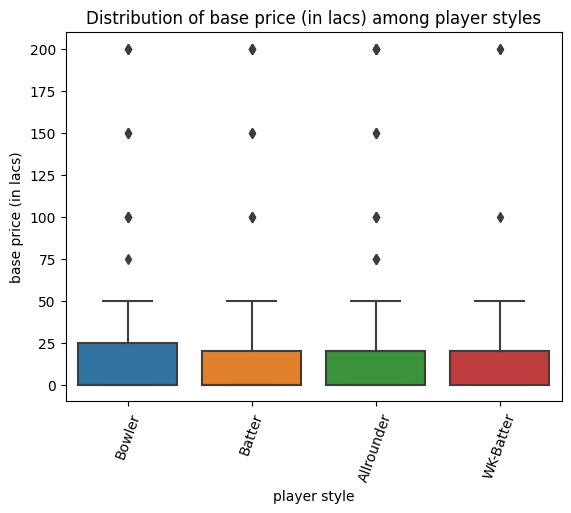

In [35]:
sns.boxplot(x='player style',y='base price (in lacs)', data=final_df)
plt.title("Distribution of base price (in lacs) among player styles")
plt.xticks(rotation = 70)
plt.show()

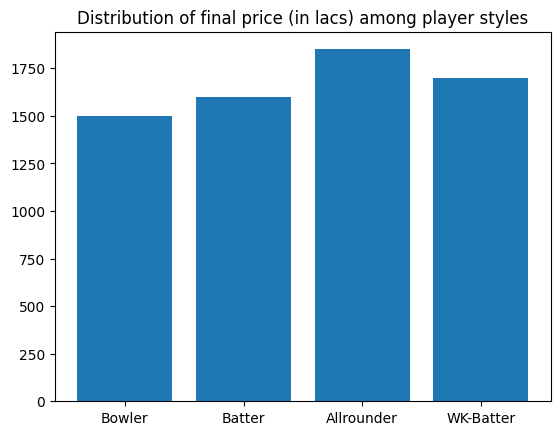

In [36]:
fig, ax=plt.subplots()
ax.bar(final_df["player style"], final_df['final price (in lacs)'])
plt.title("Distribution of final price (in lacs) among player styles")
plt.show()

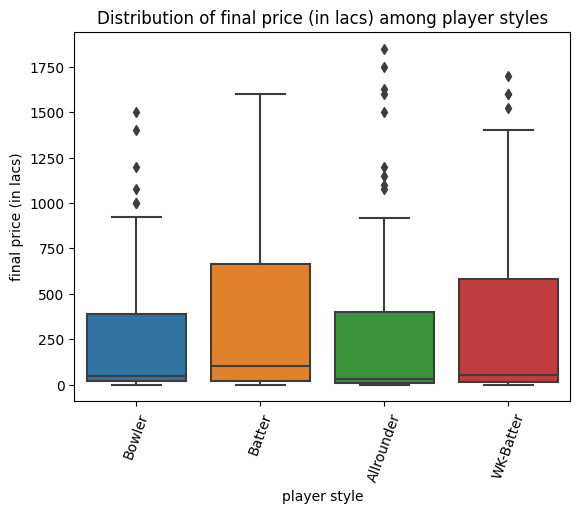

In [37]:
sns.boxplot(x='player style',y='final price (in lacs)', data=final_df)
plt.title("Distribution of final price (in lacs) among player styles")
plt.xticks(rotation = 70)
plt.show()

Distribution of the player status among the different franchaise

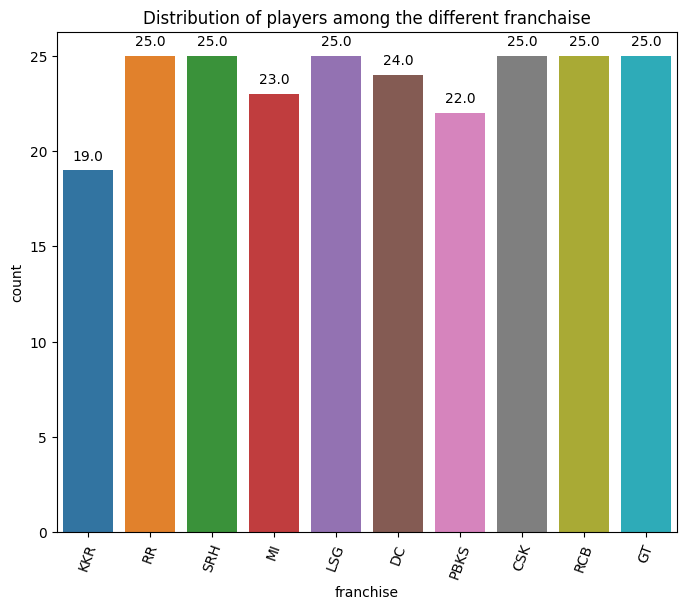

In [38]:
plt.figure(figsize=(8,6.5))
ax = sns.countplot(x="franchise", data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.title("Distribution of players among the different franchaise")
plt.xticks(rotation = 70)
plt.show()

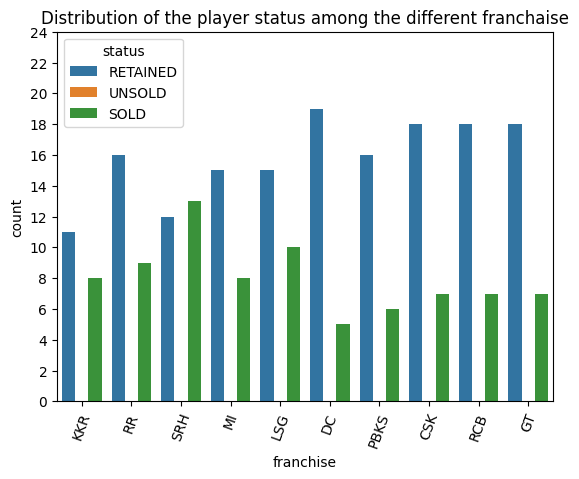

In [39]:
sns.countplot(x="franchise", hue="status", data=df)
plt.title("Distribution of the player status among the different franchaise")
plt.xticks(rotation = 70)
plt.yticks(range(0, int(ax.get_yticks().max()) - 4, 2))
plt.show()

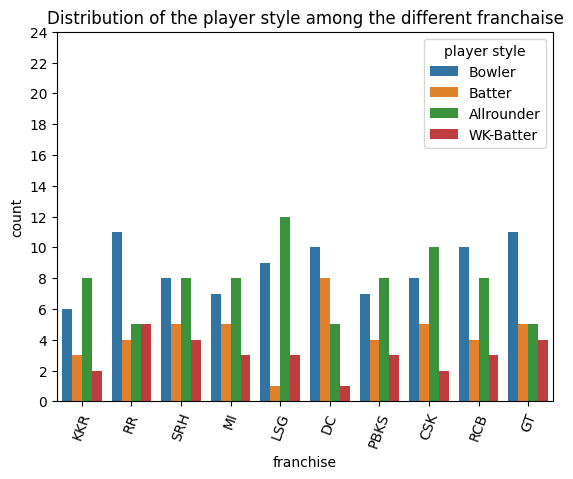

In [40]:
sns.countplot(x="franchise", hue="player style", data=df)
plt.title("Distribution of the player style among the different franchaise")
plt.xticks(rotation = 70)
plt.yticks(range(0, int(ax.get_yticks().max()) - 4, 2))
plt.show()

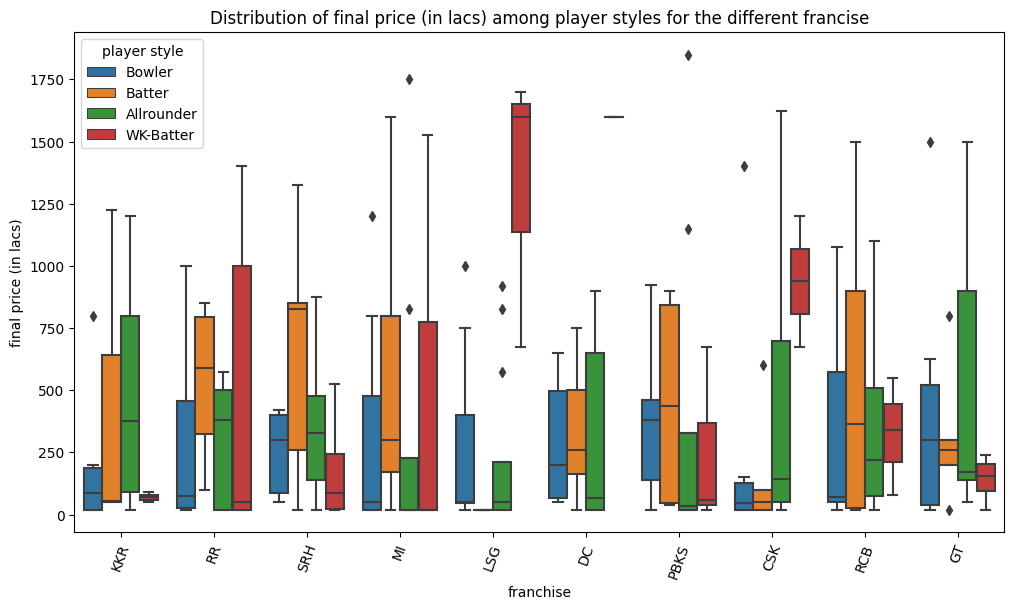

In [41]:
plt.figure(figsize=(12,6.5))
sns.boxplot(x="franchise", y = 'final price (in lacs)', hue="player style", data=df)
plt.title("Distribution of final price (in lacs) among player styles for the different francise")
plt.xticks(rotation = 70)
plt.show()

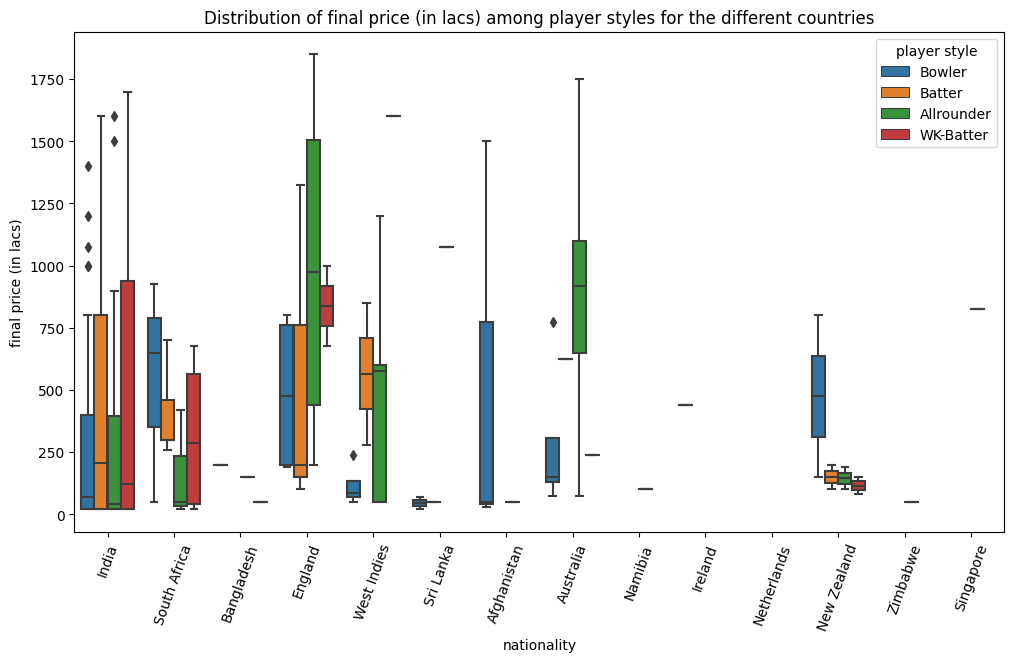

In [42]:
plt.figure(figsize=(12,6.5))
sns.boxplot(x="nationality", y = 'final price (in lacs)', hue="player style", data=df)
plt.title("Distribution of final price (in lacs) among player styles for the different countries")
plt.xticks(rotation = 70)
plt.show()

Relationship between base price and final price

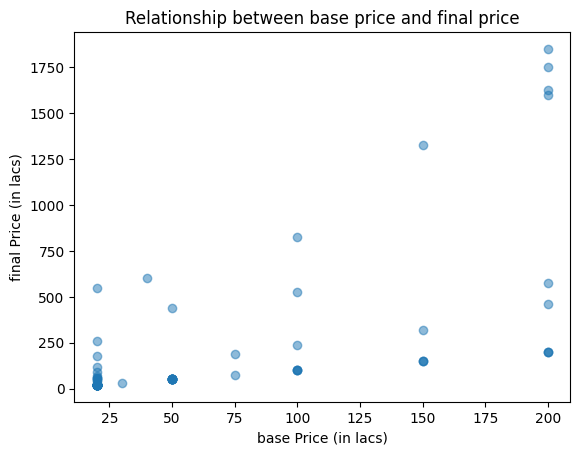

In [43]:
plt.scatter(df["base price (in lacs)"], df["final price (in lacs)"], alpha=0.5)
plt.title("Relationship between base price and final price")
plt.xlabel("base Price (in lacs)")
plt.ylabel("final Price (in lacs)")
plt.show()

# Conclusion

From the data available ~51% of the players are retained, ~25% are sold and the remaining ~23% and avilable.
Most of the players are from India
Local players are generally more affordable than international players, both their base price and their final price
The player styles retained the most are the bowlers and then all rounders.
English players have the highest base prices and final price, especially the allrounders.
Most players already sold this season are all rounders. The unsold players remaining in the market are mostly all rounders.
WK-batters are the least likely to be retained, but they are some of the highest payed players. It also has the least number of players with this style.
Base prices are comparatively small to the final prices, for all the player styles.
Most players who start the auction at low prices, end up with low final prices
Base prices are approximately constant among all player styles.
DC has the most retained players and least sold player. SRH has the most sold players.
KRR has the least amount of players with 11 retained and 8 sold players. This team still has the oppoutunity to get more players, especially batters.
LSG has the most allrounders and RR and GT ha sthe most bowlers.
Few allrounders earn very high compared to others making their distribution appear more promising, however, batters earn the highest considering the entire population and ignoring outliers.
LSG pay their WK-Batters really well.SRH pay their batters very well.